# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

## What is the relation between the age and Income?

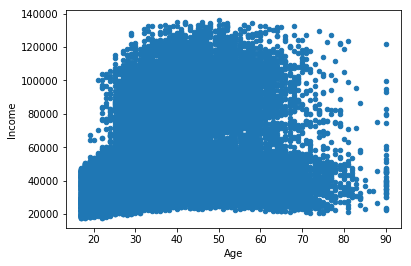

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [4]:
np.corrcoef(np.log(income['Age']),np.log(income['Income']))

array([[1.        , 0.36546776],
       [0.36546776, 1.        ]])

Según la grafica se observa que hay mucha dispersión, y una correlación positiva pero muy debil, como lo indica el coeficiente de correlación

## For a one percent increase in the Age how much the income increases?

In [37]:
y = income['Income'].values
X = income['Age'].values
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
beta

array([32538.08813087,   542.16765707])

Si la edad aumenta en una unidad, el salario lo hace en 542 dólares.

## Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf2 = SGDRegressor( max_iter=10000,tol=None)
X=income[['Age']]
y=income['Income']

clf1.fit(X,y)
clf2.fit(X,y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

#### Using OLS

In [6]:
clf1.coef_

array([542.16765707])

In [7]:
clf1.intercept_

32538.088130868626

In [8]:
clf1.predict(X=30)

array([48803.11784304])

In [9]:
clf1.predict(X=40)

array([54224.79441376])

#### Using (Stochastic) Gradient Descent

In [10]:
clf2.predict(X=30)

array([42086.81527221])

In [11]:
clf2.predict(X=40)

array([45267.42735594])

#### Plot Regressions

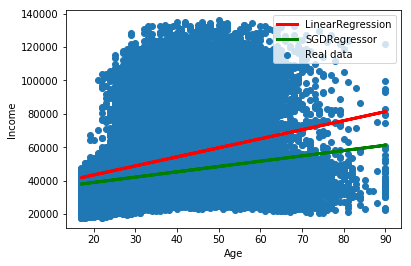

In [12]:
# scatter plot
plt.scatter(X, y)
# Plot the linear regression
plt.plot(X, clf1.predict(X), 'r', lw=3)
plt.plot(X, clf2.predict(X), 'g', lw=3)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(('LinearRegression', 'SGDRegressor', 'Real data'))
plt.show()


# Exercise 4.2
Evaluate the model using the MSE

In [13]:
y_pred=clf1.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 593783043.8402299



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

#### New variable Age$^2$

In [14]:
X=income[['Age']]
X['Age2']=income[['Age']]**2
y=income['Income']

#### Using OLS equations

In [15]:
betas_ols = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, y))
betas_ols

array([2346.62896328,  -21.97439239])

#### Using sklearn

In [16]:
# Initialize
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [17]:
linreg.coef_

array([2346.62896328,  -21.97439239])

#### MSE

In [18]:
y_pred=linreg.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 549233115.8756605


Con la inclusión de la variable Age2, el error cuadratico medio disminuye, lo que indica que esta variable mejora la predicción 

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [19]:
clf1 = LinearRegression(fit_intercept=True)
X=income[['Age','Capital Gain','Hours per week','Capital Loss']]
X['Age2']=income[['Age']]**2
y=income['Income']
clf1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
y_pred=clf1.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 494629779.5702483


Incorporando nuevas variables, se reduce el MSE, lo que indica que mejora el modelo

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [21]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [22]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


### Create X and y

In [23]:
feature_cols = ['VMail Message','Day Mins','Day Calls','Day Charge','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']
data['Churn?'] =data['Churn?'].replace(to_replace=['False.', 'True.'], value=[0, 1])
X = data[feature_cols]
y = data['Churn?']
## Convertir Tipo string a 0 y1

### What is the distribution of the churners?

In [24]:
data.pivot_table(index=['Churn?'],values='Account Length',aggfunc='count')

,Account Length
Churn?,
0,2850
1,483


In [25]:
data["Churn?"].value_counts() / len(data["Churn?"])

0    0.855086
1    0.144914
Name: Churn?, dtype: float64

El 14,5% de las oobservaciones de esta base, desertan

### Split the data in train (70%) and test (30%)

In [26]:
X_train=X.sample(frac=0.7,random_state=200)
y_train=y.iloc[X_train.index]

X_test =X.drop(X_train.index)
y_test =y.drop(y_train.index)


In [27]:
X_test.shape,y_test.shape

((1000, 13), (1000,))

In [28]:
X_train.shape,y_train.shape

((2333, 13), (2333,))

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [29]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear',C=1e9)

logreg.fit(X_train, y_train)

y_predicted = logreg.predict(X_test)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[858,   9],
       [122,  11]], dtype=int64)

858 verdaderos postivos,
9   falsos    negativos,
122 falsos positivos,
11 verdaderos negativos

In [31]:
accuracy_score(y_test, y_predicted)

0.869